In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
train_images.shape
len(train_images)

60000

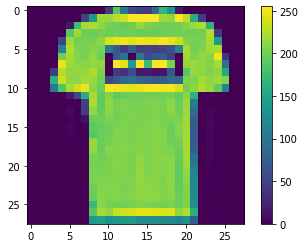

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

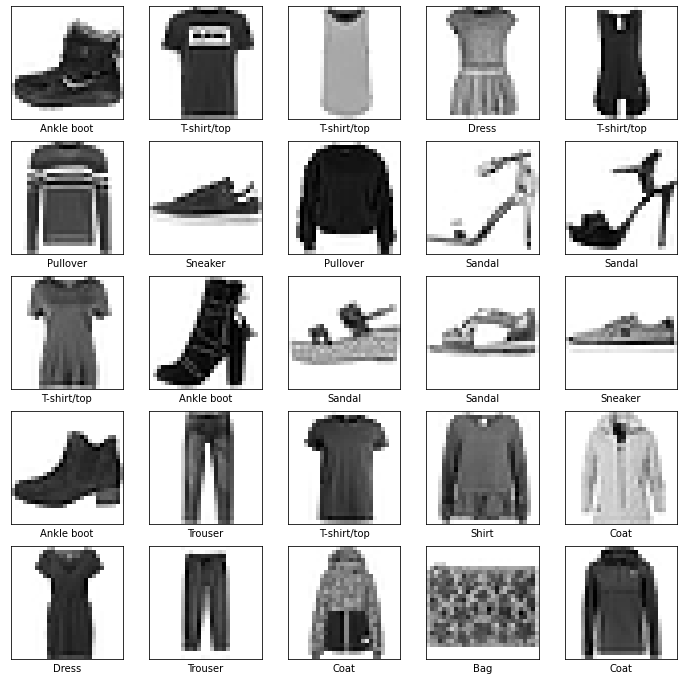

In [12]:

#given in the kaggle dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4996 - accuracy: 0.8242
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8626
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8757
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8831
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.8903
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2854 - accuracy: 0.8954
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.9008
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2608 - accuracy: 0.9023
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2495 - accuracy: 0.9072
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3585 - accuracy: 0.8858

Test accuracy: 0.8858000040054321


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([2.8433966e-13, 1.4926054e-17, 2.5091973e-17, 4.3208900e-18,
       3.3371645e-20, 3.6716894e-05, 8.5438339e-16, 3.1997537e-05,
       1.2702728e-14, 9.9993134e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

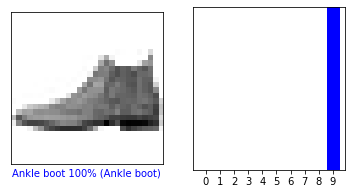

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

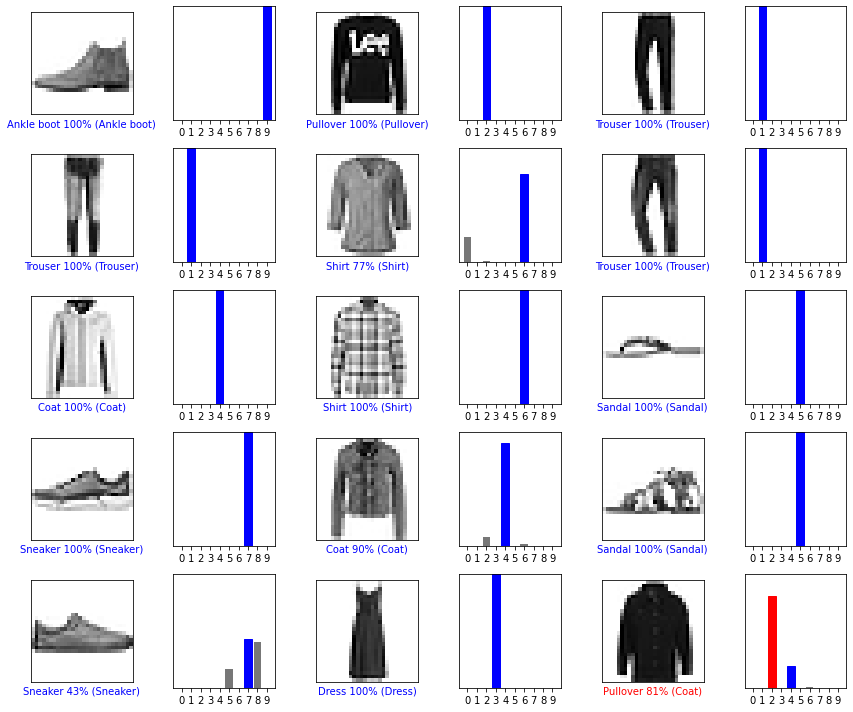

In [23]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:

img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

print(predictions_single)

(28, 28)
(1, 28, 28)
[[2.4145205e-05 3.3084270e-14 9.9979800e-01 9.0722819e-14 1.7695707e-04
  7.5455669e-11 9.0517540e-07 1.2420463e-20 5.0021497e-14 6.4516230e-20]]


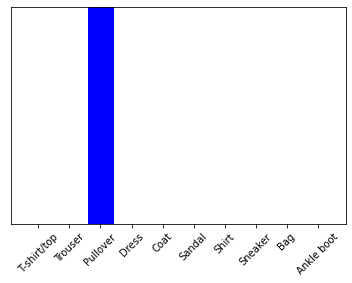

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)